# **Step 1 - Data Loading**

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading email_table
email_df = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/Quantacus_Email_Campaign_CaseStudy/email_table.csv")

# Loading email_opened_table
opened_df = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/Quantacus_Email_Campaign_CaseStudy/email_opened_table.csv")

# Loading link_clicked_table
clicked_df = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/Quantacus_Email_Campaign_CaseStudy/link_clicked_table.csv")

In [3]:
# Printing shapes to confirm successful load
print("Email Table Shape:", email_df.shape)
print("Opened Emails Table Shape:", opened_df.shape)
print("Clicked Emails Table Shape:", clicked_df.shape)

Email Table Shape: (100000, 7)
Opened Emails Table Shape: (10345, 1)
Clicked Emails Table Shape: (2119, 1)


In [4]:
# Data Overview
email_df.head(3)

,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases
0,85120,short_email,personalized,2,Sunday,US,5
1,966622,long_email,personalized,12,Sunday,UK,2
2,777221,long_email,personalized,11,Wednesday,US,2


In [5]:
opened_df.head(3)

,email_id
0,284534
1,609056
2,220820


In [6]:
clicked_df.head(3)

,email_id
0,609056
1,870980
2,935124


In [7]:
# Checking null values in each dataset
print("Nulls in email_df:\n", email_df.isnull().sum())
print("\nNulls in opened_df:\n", opened_df.isnull().sum())
print("\nNulls in clicked_df:\n", clicked_df.isnull().sum())

Nulls in email_df:
 email_id               0
email_text             0
email_version          0
hour                   0
weekday                0
user_country           0
user_past_purchases    0
dtype: int64

Nulls in opened_df:
 email_id    0
dtype: int64

Nulls in clicked_df:
 email_id    0
dtype: int64


In [8]:
# Checking datatypes
print("\nData types in email_df:\n", email_df.dtypes)


Data types in email_df:
 email_id                int64
email_text             object
email_version          object
hour                    int64
weekday                object
user_country           object
user_past_purchases     int64
dtype: object


In [9]:
# Checking unique values for important columns
print("\nUnique values in 'email_text':", email_df['email_text'].unique())
print("Unique values in 'email_version':", email_df['email_version'].unique())
print("Unique weekdays:", email_df['weekday'].unique())
print("User Country:", email_df['user_country'].unique())


Unique values in 'email_text': ['short_email' 'long_email']
Unique values in 'email_version': ['personalized' 'generic']
Unique weekdays: ['Sunday' 'Wednesday' 'Monday' 'Saturday' 'Friday' 'Tuesday' 'Thursday']
User Country: ['US' 'UK' 'FR' 'ES']


In [10]:
# Checking shape of all datasets
print("Email Table Shape:", email_df.shape)
print("Opened Emails Table Shape:", opened_df.shape)
print("Clicked Emails Table Shape:", clicked_df.shape)

Email Table Shape: (100000, 7)
Opened Emails Table Shape: (10345, 1)
Clicked Emails Table Shape: (2119, 1)


# **Step 2: Merging Data and Creating Target Labels**

We are adding two new columns:

- **opened** → 1 if the email was opened, 0 otherwise

- **clicked** → 1 if the link inside the email was clicked, 0 otherwise

Master df is nothing but the merging of all datasets

In [11]:
 # Creating a copy of the email_df
master_df = email_df.copy()

In [12]:
# Creating 'opened' column → 1 if email_id is in opened_emails, else 0
master_df['opened'] = master_df['email_id'].isin(opened_df['email_id']).astype(int)

In [13]:
master_df.head(1)

,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases,opened
0,85120,short_email,personalized,2,Sunday,US,5,0


In [14]:
# Create 'clicked' column → 1 if email_id is in clicked_emails, else 0
master_df['clicked'] = master_df['email_id'].isin(clicked_df['email_id']).astype(int)

In [15]:
master_df.head(1)

,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases,opened,clicked
0,85120,short_email,personalized,2,Sunday,US,5,0,0


In [16]:
# checking value counts for the both columns 'opened' and 'clicked'
print(master_df['opened'].value_counts())
print(master_df['clicked'].value_counts())

opened
0    89655
1    10345
Name: count, dtype: int64
clicked
0    97881
1     2119
Name: count, dtype: int64


#**Step 3 - Exploratory Data Analysis (EDA)**

**1) What percentage of users opened the email and what percentage clicked on the link within the email ? (Finding click-through-Rate)**

In [17]:
# Total emails sent
total_emails = master_df.shape[0]

# Total emails opened
total_opened = master_df['opened'].sum()

# Total emails clicked
total_clicked = master_df['clicked'].sum()

# Open Rate
open_rate = total_opened / total_emails * 100

# Click-through Rate
click_rate = total_clicked / total_emails * 100

# Percentage of clicks from those who opened the email
click_rate_among_opened = (total_clicked / total_opened) * 100

print(f"Total Emails Sent: {total_emails}")
print(f"Emails Opened: {total_opened} ({open_rate:.2f}%)")
print(f"Emails Clicked: {total_clicked} ({click_rate:.2f}%)")

Total Emails Sent: 100000
Emails Opened: 10345 (10.35%)
Emails Clicked: 2119 (2.12%)


- **Total Emails Sent**: 100,000  
- **Emails Opened**: 10,345 (**10.35%**)  
- **Emails Clicked**: 2,119 (**2.12%**)  

This means that out of all users who opened the email, approximately **1 in 5 clicked** on the link inside.

---

<Axes: xlabel='clicked', ylabel='count'>

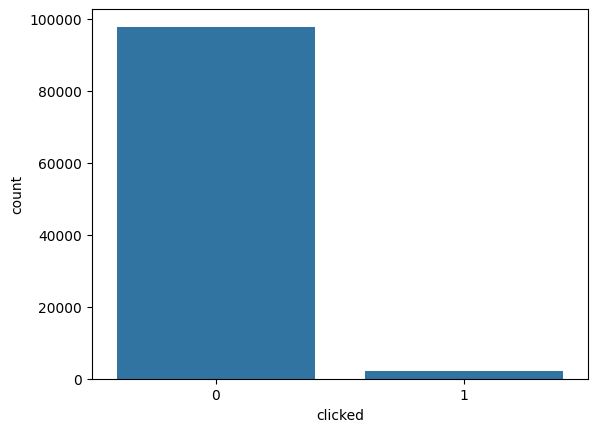

In [18]:
sns.countplot(data=master_df, x='clicked')

**2) Analyzing how different features affect performance (like which type of email text/version/hour/week performed better)**

- `Click Rate by email_text (short vs. long)`

In [19]:
click_rate_by_text = master_df.groupby('email_text')['clicked'].agg(['sum','count'])
click_rate_by_text['click_rate'] = click_rate_by_text['sum'] / click_rate_by_text['count'] * 100
click_rate_by_text.reset_index(inplace=True)
print(click_rate_by_text)

    email_text   sum  count  click_rate
0   long_email   932  50276    1.853767
1  short_email  1187  49724    2.387177


<ipython-input-20-170b01add4ca>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=click_rate_by_text, x='email_text', y='click_rate', palette='viridis')


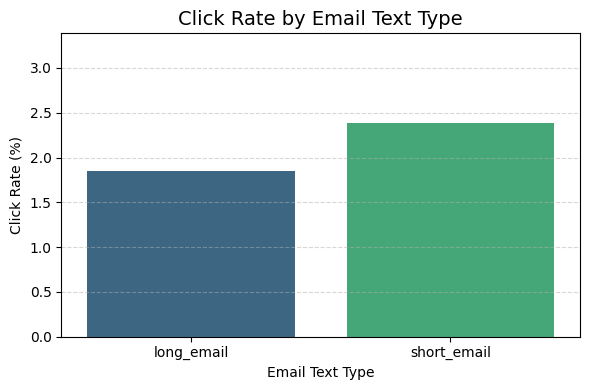

In [20]:
# Bar plot for click rate by email_text
plt.figure(figsize=(6, 4))
sns.barplot(data=click_rate_by_text, x='email_text', y='click_rate', palette='viridis')

plt.title('Click Rate by Email Text Type', fontsize=14)
plt.xlabel('Email Text Type')
plt.ylabel('Click Rate (%)')
plt.ylim(0, click_rate_by_text['click_rate'].max() + 1)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Short Emails perform better in terms of clicks compared to long ones.

---

- `Analyzing Click Rate Based on email_version (Personalized vs. Generic)`

In [21]:
 click_rate_by_version = master_df.groupby('email_version')['clicked'].agg(['sum','count'])
 click_rate_by_version['click_rate'] = click_rate_by_version['sum'] / click_rate_by_version['count'] * 100
 click_rate_by_version.reset_index(inplace=True)
 print(click_rate_by_version)

  email_version   sum  count  click_rate
0       generic   760  50209    1.513673
1  personalized  1359  49791    2.729409


<ipython-input-22-f8f23384235f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=click_rate_by_version, x='email_version', y='click_rate', palette='Set2')


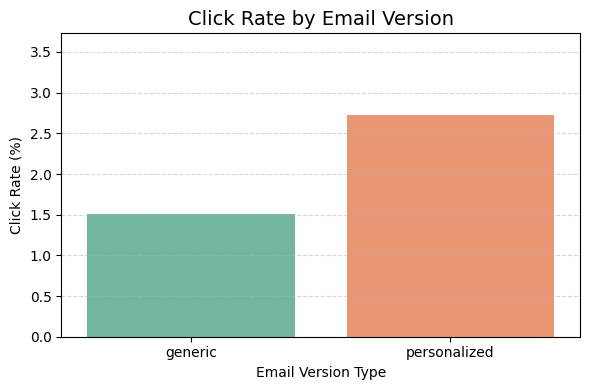

In [22]:
# Bar plot for click rate by email_version
plt.figure(figsize=(6, 4))
sns.barplot(data=click_rate_by_version, x='email_version', y='click_rate', palette='Set2')

plt.title('Click Rate by Email Version', fontsize=14)
plt.xlabel('Email Version Type')
plt.ylabel('Click Rate (%)')
plt.ylim(0, click_rate_by_version['click_rate'].max() + 1)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Personalized emails had a significantly higher click rate (2.73%) compared to generic ones (1.51%).
That’s roughly 80% more clicks when using personalization.

---

- `Analyzing Click Rate Based on weekdays`

In [23]:
# Group by weekday
weekday_stats = master_df.groupby('weekday').agg(
    sum=('clicked', 'sum'),
    count=('email_id', 'count')
).reset_index()

# Calculate click-through rate (CTR)
weekday_stats['click_rate'] = (weekday_stats['sum'] / weekday_stats['count']) * 100

# Sort by click rate for better comparison
weekday_stats = weekday_stats.sort_values(by='click_rate', ascending=False)
print(weekday_stats)

     weekday  sum  count  click_rate
6  Wednesday  389  14084    2.761999
5    Tuesday  352  14143    2.488864
4   Thursday  349  14277    2.444491
1     Monday  329  14363    2.290608
2   Saturday  260  14569    1.784611
3     Sunday  241  14387    1.675123
0     Friday  199  14177    1.403682


<ipython-input-24-a8eb3bcaa04f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=weekday_stats, x='weekday', y='click_rate', palette='viridis')


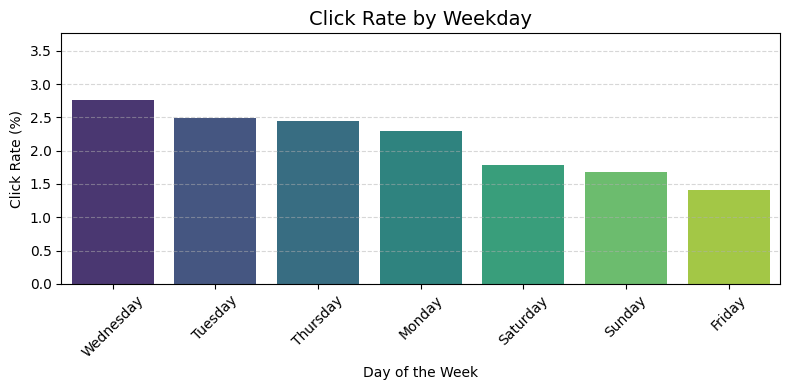

In [24]:
# Bar plot for click rate by weekday
plt.figure(figsize=(8, 4))
sns.barplot(data=weekday_stats, x='weekday', y='click_rate', palette='viridis')

plt.title('Click Rate by Weekday', fontsize=14)
plt.xlabel('Day of the Week')
plt.ylabel('Click Rate (%)')
plt.xticks(rotation=45)
plt.ylim(0, weekday_stats['click_rate'].max() + 1)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

**Wednesday** performed best with a CTR of **2.76%**

**Friday** was the worst with a CTR of only **1.40%**

This insight can help us **schedule emails on higher-performing days** to boost engagement.

---

- `Click Rate by hours`

In [25]:
hour_stats = master_df.groupby('hour').agg(
    sum=('clicked', 'sum'),
    count=('email_id', 'count')
).reset_index()

hour_stats['click_rate'] = (hour_stats['sum'] / hour_stats['count']) * 100

# Sort by hour to maintain chronological order
hour_stats = hour_stats.sort_values('hour')

# Show the result
print(hour_stats)

    hour  sum  count  click_rate
0      1   49   2703    1.812801
1      2   60   3676    1.632209
2      3   90   4610    1.952278
3      4   91   5622    1.618641
4      5  118   6551    1.801252
5      6  128   7465    1.714668
6      7  150   8204    1.828376
7      8  159   8398    1.893308
8      9  220   8529    2.579435
9     10  231   8180    2.823961
10    11  203   7483    2.712816
11    12  167   6508    2.566073
12    13  111   5581    1.988891
13    14   95   4580    2.074236
14    15   87   3493    2.490696
15    16   64   2759    2.319681
16    17   35   1893    1.848917
17    18   23   1421    1.618578
18    19   15    905    1.657459
19    20    8    656    1.219512
20    21    3    365    0.821918
21    22    4    204    1.960784
22    23    6    145    4.137931
23    24    2     69    2.898551


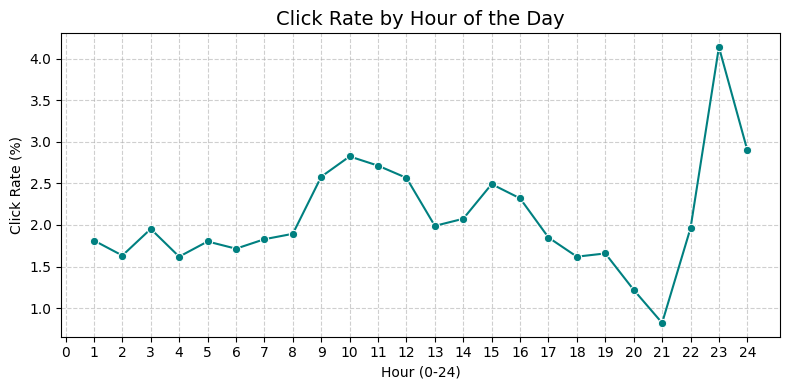

In [26]:
# Line plot for click rate by hour
plt.figure(figsize=(8, 4))
sns.lineplot(data=hour_stats, x='hour', y='click_rate', marker='o', color='teal')

plt.title('Click Rate by Hour of the Day', fontsize=14)
plt.xlabel('Hour (0-24)')
plt.ylabel('Click Rate (%)')
plt.xticks(range(0, 25))
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Best-performing hours: 10 AM had the highest click-through rate at 2.82%. 11 AM and 9 AM also performed well with 2.71% and 2.57% respectively.

Interestingly, 11 PM (hour 23) showed a spike, but the sample size was very small (only 145 emails), so it's not a reliable pattern.But we can say that there is a good user engagement that time so we can try that time by sending emails on that time.

Lowest click rates: Late night hours like 9 PM (0.82%) and 8 PM (1.21%) had the worst performance. These hours likely have less user engagement.

Conclusion: Highest click rates occur late at night (11 PM–12 AM) and mid-morning (9–11 AM), indicating strong user engagement during these hours.

---

- `Click Rate by user_country`

In [27]:
# Grouping by country
country_stats = master_df.groupby('user_country').agg(
    sum=('clicked', 'sum'),
    count=('email_id', 'count')
).reset_index()

# Calculating CTR
country_stats['click_rate'] = (country_stats['sum'] / country_stats['count']) * 100

# Sort by click rate
country_stats = country_stats.sort_values(by='click_rate', ascending=False)
print(country_stats)

  user_country   sum  count  click_rate
2           UK   492  19939    2.467526
3           US  1464  60099    2.435981
0           ES    83   9967    0.832748
1           FR    80   9995    0.800400


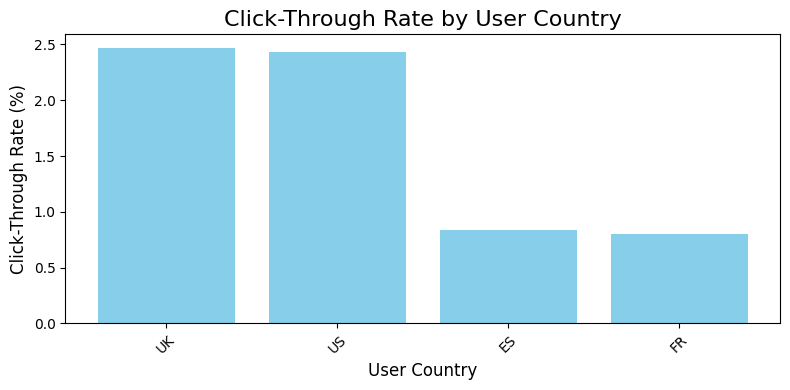

In [28]:
# Bar chart for click rate by user_country
plt.figure(figsize=(8,4))
plt.bar(country_stats['user_country'], country_stats['click_rate'], color='skyblue')

# Adding labels and title
plt.title('Click-Through Rate by User Country', fontsize=16)
plt.xlabel('User Country', fontsize=12)
plt.ylabel('Click-Through Rate (%)', fontsize=12)

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Users from **UK** and **US** are almost **3x** more likely to click compared to users from **France** or **Spain**.

---

- `Click Rate by user_past_purchases`

To better understand the behavior of users based on their past purchase history, we binned the number of past purchases into categories:

- **0**: No previous purchases
- **1**: 1 past purchase
- **2-3**: 2 to 3 past purchases
- **4-10**: 4 to 10 past purchases
- **10+**: More than 10 past purchases

In [29]:
# Optionally bin purchases if there are too many unique values
master_df['purchase_bins'] = pd.cut(master_df['user_past_purchases'], bins=[-1, 0, 1, 3, 10, 100],
                                     labels=['0', '1', '2-3', '4-10', '10+'])

# Group by bins
purchase_stats = master_df.groupby('purchase_bins').agg(
    sum=('clicked', 'sum'),
    count=('email_id', 'count')
).reset_index()

purchase_stats['click_rate'] = (purchase_stats['sum'] / purchase_stats['count']) * 100
print(purchase_stats)

  purchase_bins   sum  count  click_rate
0             0     7  13877    0.050443
1             1   154  13751    1.119919
2           2-3   400  25113    1.592801
3          4-10  1292  43406    2.976547
4           10+   266   3853    6.903711


<ipython-input-29-02b3face0187>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  purchase_stats = master_df.groupby('purchase_bins').agg(


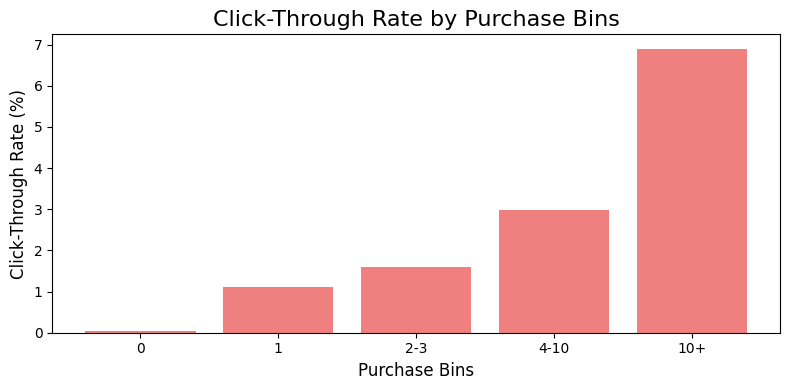

In [30]:
# Bar chart for click rate by purchase_bins
plt.figure(figsize=(8,4))
plt.bar(purchase_stats['purchase_bins'], purchase_stats['click_rate'], color='lightcoral')

# Adding labels and title
plt.title('Click-Through Rate by Purchase Bins', fontsize=16)
plt.xlabel('Purchase Bins', fontsize=12)
plt.ylabel('Click-Through Rate (%)', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

- The CTR increases significantly as the number of past purchases increases. Users who have made more purchases in the past tend to click more on the email links.
- The highest CTR (6.90%) is observed in users with more than 10 past purchases, while the lowest CTR (0.05%) is observed in users with no previous purchases.
- This suggests that targeting users with previous purchase history could improve click-through rates, which is valuable for future marketing strategies.

This segmentation can help optimize email campaigns based on user purchase history.

---

#**Step 4 - Encoding**

### Encoding Categorical Features  
We applied **Target Encoding** to handle categorical variables.  
It captures the relationship between the feature and the target variable, making it more informative than One-Hot Encoding for this case.  
This also helps avoid the curse of dimensionality in high-cardinality features.

In [31]:
master_df['clicked'].value_counts()

,count
clicked,
0,97881
1,2119


The target variable is highly imbalanced with 0: 97,881 and 1: 2,119.  
To handle this, we apply **SMOTE (oversampling)** on the training data only, as undersampling would lead to loss of valuable information.

---

In [32]:
# Making a copy of master df
df = master_df.copy()

In [33]:
# Dropping unwanted columns
df = df.drop(columns=['email_id','purchase_bins'])

In [34]:
df.head(1)

,email_text,email_version,hour,weekday,user_country,user_past_purchases,opened,clicked
0,short_email,personalized,2,Sunday,US,5,0,0


In [35]:
# Installing for target encoders
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.4 MB/s eta 0:00:00


In [36]:
from category_encoders import TargetEncoder
categorical_cols = ['email_text', 'email_version', 'weekday', 'user_country']
encoder = TargetEncoder(cols=categorical_cols)

In [37]:
encoder

TargetEncoder(cols=['email_text', 'email_version', 'weekday', 'user_country'])

In [38]:
# Preparing X and y data
X = df.drop(columns=['clicked'])
y = df['clicked']

In [39]:
# Fit the encoder only on X and y
X_encoded = encoder.fit_transform(X, y)

In [40]:
df['user_past_purchases'].unique()

array([ 5,  2,  1,  6,  3,  8,  4,  9,  0, 11, 10,  7, 13, 12, 18, 14, 20,
       15, 16, 17, 19, 22, 21])

In [41]:
# Final encoded DataFrame
X_encoded.head()

,email_text,email_version,hour,weekday,user_country,user_past_purchases,opened
0,0.023872,0.027294,2,0.016751,0.024360,5,0
1,0.018538,0.027294,12,0.016751,0.024675,2,1
2,0.018538,0.027294,11,0.027620,0.024360,2,0
3,0.023872,0.015137,6,0.022906,0.024675,1,0
4,0.018538,0.015137,14,0.022906,0.024360,6,0


# **Step 5 - Model Building**

##  Model Building

we will build models to solve a **binary classification problem** based on the case study provided.

Our goal is to accurately classify the records into two categories — class 0 (not-Clicked) and class 1(Clicked) — using different machine learning models.

We will begin with a baseline model and gradually progress toward more complex techniques:

1. **Logistic Regression** – A commonly used linear model to establish a baseline.
2. **Naive Bayes** – A probabilistic classifier that works well with categorical features.
3. **XGBoost** – A powerful tree-based boosting algorithm, used here with **SMOTE** to address class imbalance.

Each model will be evaluated using:
- **Accuracy**
- **Precision, Recall, and F1-Score**
- **Confusion Matrix**

This helps us understand the model's ability to correctly classify both majority and minority classes.


I am thinking to experiment with both **imbalanced data** and **balanced data using SMOTE** to observe the performance impact.  
Each model was trained and evaluated on both versions of the data.  
This helped us identify which model performs best under each condition.

---

###**Train Test Split**

To evaluate model performance reliably, we split the dataset into training and testing sets using an 80-20 split.  
`Note: SMOTE (oversampling) is applied **only on the training data** to avoid data leakage.`

In [42]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [43]:
# Split the encoded data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42, stratify=y)

In [44]:
print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")
print(f"Training target distribution:\n{y_train.value_counts()}")
print(f"Test target distribution:\n{y_test.value_counts()}")

Training set size: (80000, 7)
Test set size: (20000, 7)
Training target distribution:
clicked
0    78305
1     1695
Name: count, dtype: int64
Test target distribution:
clicked
0    19576
1      424
Name: count, dtype: int64


Here we can observe that we have the imbalance distribution of data              
so we go with sampling techniques(`Target sampling`) to balance the class 1

---

In [45]:
# Initialize SMOTE
smote = SMOTE(random_state=42)

# Applying SMOTE only on the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Checking the new class distribution
print("After SMOTE:")
print(y_train_smote.value_counts())

After SMOTE:
clicked
0    78305
1    78305
Name: count, dtype: int64


Now the class is balanced in the Training set      
No need to apply on testing set it will lead to data leakage

---

##**Feature Selection using Mutual Information**

<ipython-input-46-8a85b51c1753>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_scores_df.sort_values('Score', ascending=False), x='Score', y='Feature', palette='coolwarm')


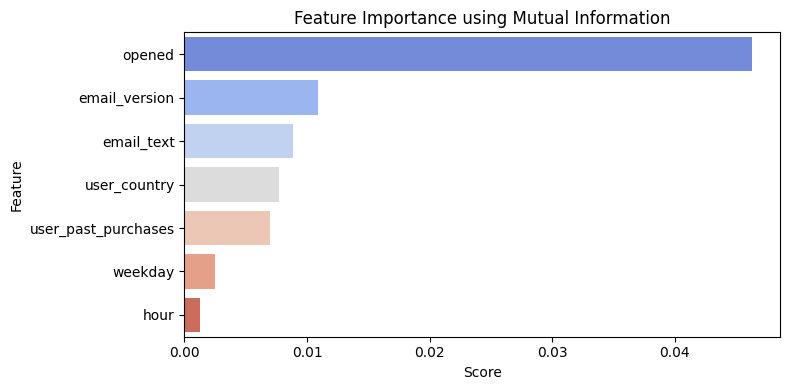

In [46]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Apply SelectKBest
selector = SelectKBest(score_func=mutual_info_classif, k='all')
selector.fit(X_train, y_train)

# Store results
scores = selector.scores_
feat_scores_df = pd.DataFrame({'Feature': X_train.columns, 'Score': scores})

# Plot
plt.figure(figsize=(8, 4))
sns.barplot(data=feat_scores_df.sort_values('Score', ascending=False), x='Score', y='Feature', palette='coolwarm')
plt.title('Feature Importance using Mutual Information')
plt.tight_layout()
plt.show()

**We used Mutual Information to find important features affecting the target. The feature opened showed the highest importance in our dataset.**

##**1 - Logistic Regression**

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize the model
lr_model = LogisticRegression(max_iter=1000, random_state=42)

# Fit the model on oversampled training data
lr_model.fit(X_train_smote, y_train_smote)

# Predict on test data (original test data, not resampled)
y_pred_lr = lr_model.predict(X_test)

# Evaluate the model
print("Logistic Regression Performance:\n")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

Logistic Regression Performance:

Accuracy: 0.92065

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96     19576
           1       0.21      0.99      0.35       424

    accuracy                           0.92     20000
   macro avg       0.60      0.95      0.65     20000
weighted avg       0.98      0.92      0.94     20000


Confusion Matrix:
 [[17994  1582]
 [    5   419]]


### Logistic Regression Model Performance

The model achieved an accuracy of **92.06%**, but the class imbalance still impacted the precision for the minority class (clicks). The precision for predicting clicks (Class 1) was **0.21**, while the recall was high at **0.99**, indicating that the model is good at detecting clicks but struggles with false positives. The confusion matrix revealed a large number of false positives, which can be addressed by adjusting the decision threshold.

-----

# **2 - Naive Bias**

In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [49]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

In [50]:
# Initialize Naive Bayes model
nb_model = GaussianNB()

In [51]:
nb_model

GaussianNB()

In [52]:
nb_model.fit(X_train_scaled, y_train_smote)

GaussianNB()

In [53]:
# Predict on the test data
y_pred_nb = nb_model.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


In [54]:
# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Classification Report:\n", classification_report(y_test, y_pred_nb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))

Accuracy: 0.53375
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.52      0.69     19576
           1       0.04      0.95      0.08       424

    accuracy                           0.53     20000
   macro avg       0.52      0.74      0.38     20000
weighted avg       0.98      0.53      0.67     20000

Confusion Matrix:
 [[10272  9304]
 [   21   403]]


In [55]:
y_test.value_counts()

,count
clicked,
0,19576
1,424


## **3 - XGBoost**

For Xgboost First we go with `Imbalanced Data`, it have the ability to deal with it.

In [56]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [57]:
# Basic scale_pos_weight to handle imbalance
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

xgb_model = XGBClassifier(
    n_estimators=200,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=scale_pos_weight,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:26:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.92575
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96     19576
           1       0.22      0.99      0.36       424

    accuracy                           0.93     20000
   macro avg       0.61      0.96      0.66     20000
weighted avg       0.98      0.93      0.95     20000

Confusion Matrix:
 [[18096  1480]
 [    5   419]]


In [58]:
# Get predicted probabilities for the positive class
y_probs = xgb_model.predict_proba(X_test)[:, 1]

# Apply a new threshold (e.g., 0.7 instead of 0.5)
y_pred_thresh = (y_probs > 0.7).astype(int)

# Evaluate again
print("New Classification Report:\n", classification_report(y_test, y_pred_thresh))
print("New Confusion Matrix:\n", confusion_matrix(y_test, y_pred_thresh))

New Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96     19576
           1       0.22      0.99      0.36       424

    accuracy                           0.93     20000
   macro avg       0.61      0.96      0.66     20000
weighted avg       0.98      0.93      0.95     20000

New Confusion Matrix:
 [[18107  1469]
 [    5   419]]


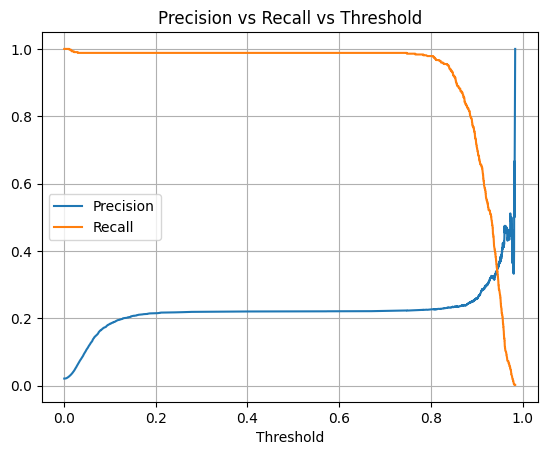

In [59]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)

plt.plot(thresholds, precisions[:-1], label='Precision')
plt.plot(thresholds, recalls[:-1], label='Recall')
plt.xlabel('Threshold')
plt.legend()
plt.grid(True)
plt.title("Precision vs Recall vs Threshold")
plt.show()

### ✅ XGBoost Classifier (Imbalanced Data)

- XGBoost performed well on the imbalanced dataset without SMOTE.
- Achieved **Accuracy: 92.57%**, with **Recall: 0.99** for the minority class.
- Very low false negatives (only 5), indicating excellent ability to detect the minority class.
- Suggests that XGBoost's internal handling of imbalance (boosting focus + proper weighting) works effectively.

#**Conclusion**

### Model Selection Summary

After experimenting with multiple models to handle class imbalance and optimize minority class prediction, I selected **XGBoost** based on the following:

-  **Logistic Regression (with SMOTE)**: High recall but very low precision for the minority class (many false positives).
-  **Gaussian Naive Bayes**: Poor overall accuracy and performance — not suitable for this dataset.
-  **XGBoost (on imbalanced data)**:  
  - Achieved **highest overall accuracy (92.57%)**  
  - **Recall: 0.99** for the minority class  
  - Better precision than Logistic Regression  
  - No need for oversampling — handled imbalance using `scale_pos_weight`

**Conclusion**: XGBoost provides the best trade-off between accuracy, recall, and model efficiency. Further models (e.g., LightGBM, CatBoost) may be explored if needed, but XGBoost meets the current project goals effectively.


# **So to find our model .how much it will increase the Click Through Rate**

Total test users = 20,000  
Actual 'clicked' = 424  
Baseline CTR (random sending) = 424 / 20,000 = 2.12%

so in our test data we have 20000 users who received our email and in that 424 users are clicked so the click through rate is 2.12%

---

Predicting probabilities using our trained XGBoost model

In [60]:
y_probs = xgb_model.predict_proba(X_test)[:, 1]

---

Pick top users based on predicted probability

In [61]:
import numpy as np
import pandas as pd

# Create DataFrame with actual and predicted probs
results = pd.DataFrame({
    'actual': y_test,
    'proba': y_probs
})

# Sort by probability
results = results.sort_values(by='proba', ascending=False)

# Select top 5000 users
top_5000 = results.head(5000)

# Count how many actually clicked
clicked_in_top_5000 = top_5000['actual'].sum()

# CTR in top 5000
ctr_top_5000 = clicked_in_top_5000 / 5000


In [62]:
top_5000

,actual,proba
45893,1,0.983649
44011,0,0.982046
8355,1,0.982005
16991,0,0.981418
36794,0,0.981264
...,...,...
34752,0,0.039407
49624,0,0.039401
3041,0,0.039401
18934,0,0.039401


In [63]:
results

,actual,proba
45893,1,0.983649
44011,0,0.982046
8355,1,0.982005
16991,0,0.981418
36794,0,0.981264
...,...,...
82672,0,0.001294
91844,0,0.001141
45932,0,0.001141
43643,0,0.000899


In [64]:
clicked_in_top_5000

np.int64(419)

In [65]:
ctr_top_5000

np.float64(0.0838)

**With the model-based strategy, the click-through rate (CTR) improves from 2.12% with random email sending to 8.38%. This results in an approximate improvement of 296% in CTR, demonstrating that the model significantly enhances email targeting and boosts user engagement.**

#Finding Important Features according to XGBoost

In [66]:
xgb_model.feature_importances_

array([0.00531783, 0.00779638, 0.00504805, 0.00557902, 0.00767449,
       0.016909  , 0.95167524], dtype=float32)

In [67]:
xgb_model.get_booster().feature_names

['email_text',
 'email_version',
 'hour',
 'weekday',
 'user_country',
 'user_past_purchases',
 'opened']

Weight: The number of times a feature is used to split the data across all trees.

Gain: The average gain of the feature when it is used in trees. A higher gain means the feature provides more improvement to the model.

Cover: The average coverage of the feature when it is used in trees. This indicates the number of samples affected by the feature.

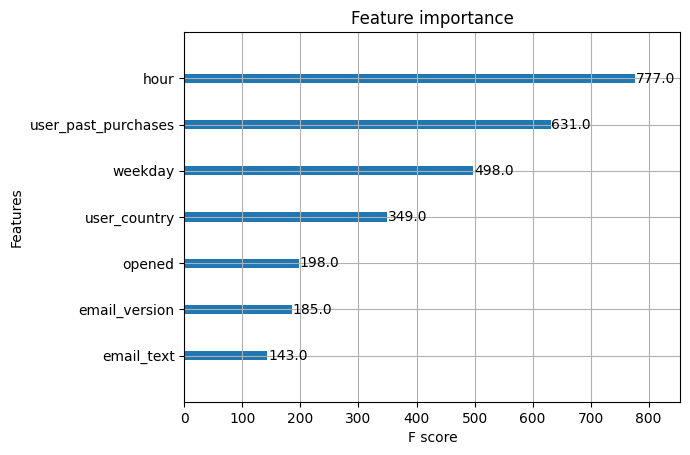

In [71]:
import xgboost as xgb
import matplotlib.pyplot as plt

# Plot feature importance
xgb.plot_importance(xgb_model, importance_type='weight')
plt.show()

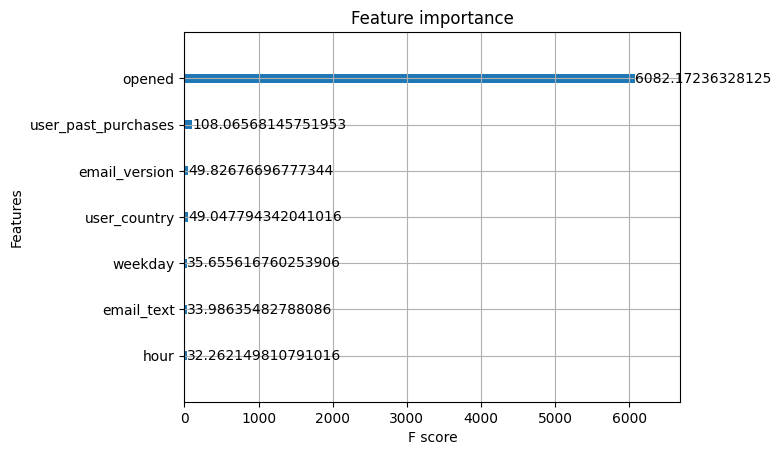

In [70]:
import xgboost as xgb
import matplotlib.pyplot as plt

# Plot feature importance
xgb.plot_importance(xgb_model, importance_type='gain')
plt.show()

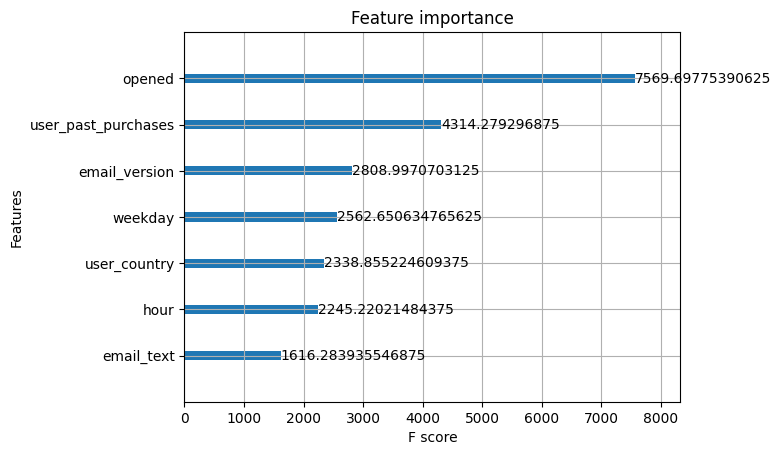

In [72]:
import xgboost as xgb
import matplotlib.pyplot as plt

# Plot feature importance
xgb.plot_importance(xgb_model, importance_type='cover')
plt.show()

In [73]:
# Retrieve feature importance using get_score() and store it in a variable
feature_importance = xgb_model.get_booster().get_score(importance_type='weight')

# You can now treat feature_importance as a dictionary
print(feature_importance)

{'email_text': 143.0, 'email_version': 185.0, 'hour': 777.0, 'weekday': 498.0, 'user_country': 349.0, 'user_past_purchases': 631.0, 'opened': 198.0}


# 4 - CAT boost


Trying CATBoost to see do we get any good Performance

In [74]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 6.0 MB/s eta 0:00:00


In [75]:
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Create model
cat_model = CatBoostClassifier(
    iterations=200,
    depth=4,
    learning_rate=0.05,
    scale_pos_weight=scale_pos_weight,  # same imbalance trick
    random_seed=42,
    verbose=0
)

# Train model
cat_model.fit(X_train, y_train)

# Predict
y_pred_cat = cat_model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred_cat))
print("Classification Report:\n", classification_report(y_test, y_pred_cat))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_cat))

Accuracy: 0.92575
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96     19576
           1       0.22      0.99      0.36       424

    accuracy                           0.93     20000
   macro avg       0.61      0.96      0.66     20000
weighted avg       0.98      0.93      0.95     20000

Confusion Matrix:
 [[18096  1480]
 [    5   419]]


With smote data

In [76]:
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Create model
cat_model = CatBoostClassifier(
    iterations=200,
    depth=4,
    learning_rate=0.05,
    scale_pos_weight=scale_pos_weight,  # same imbalance trick
    random_seed=42,
    verbose=0
)

# Train model
cat_model.fit(X_train_smote, y_train_smote)

# Predict
y_pred_cat = cat_model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred_cat))
print("Classification Report:\n", classification_report(y_test, y_pred_cat))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_cat))

Accuracy: 0.92195
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96     19576
           1       0.21      0.99      0.35       424

    accuracy                           0.92     20000
   macro avg       0.61      0.95      0.65     20000
weighted avg       0.98      0.92      0.95     20000

Confusion Matrix:
 [[18020  1556]
 [    5   419]]


CAT Boost also Giving same results as XGBoost and This two models are good at Handling Data Imbalance,So we go with XGBoost .



---

#                                   **THE END...**

---